In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    if latents is not None:
        latents = pca.transform(latents)
        for i in range(100):
            ax.plot(latents[:,0], latents[:,1], latents[:,2], 'k')
    ax.set_title('Model FPS')
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

In [3]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)
pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NoisyGRU/max_epochs=500 n_samples=1000 latent_size=64 seed=0 learning_rate=0.001/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)

path_NODE =pathTT + "20240503_Fig1_NBFF_NODE_TT_GRU/gen_model=NoisyGRU_RNN prefix=20240503_Fig1_NBFF_NoisyGRU seed=0 max_epochs=1000 latent_size=3/"
path_LDS = pathTT + "20240503_Fig1_NBFF_LDS_TT_GRU/gen_model=NoisyGRU_RNN prefix=20240503_Fig1_NBFF_NoisyGRU seed=0 max_epochs=1000 latent_size=64/"
path_GRU = pathTT + "20240503_Fig1_NBFF_GRU_TT_GRU/gen_model=NoisyGRU_RNN prefix=20240503_Fig1_NBFF_NoisyGRU seed=0 max_epochs=1000 latent_size=64/"

/home/csverst/Github/CtDBenchmark/



Iteration 500/40000
q = 4.31E-04 +/- 1.76E-03
dq = 1.50E-06 +/- 6.61E-06

Iteration 1000/40000
q = 1.33E-04 +/- 5.43E-04
dq = 2.24E-07 +/- 9.61E-07

Iteration 1500/40000
q = 6.66E-05 +/- 2.57E-04
dq = 7.84E-08 +/- 3.49E-07

Iteration 2000/40000
q = 3.97E-05 +/- 1.38E-04
dq = 4.01E-08 +/- 1.63E-07

Iteration 2500/40000
q = 2.59E-05 +/- 8.08E-05
dq = 2.74E-08 +/- 8.75E-08

Iteration 3000/40000
q = 1.79E-05 +/- 5.06E-05
dq = 2.22E-08 +/- 5.78E-08

Iteration 3500/40000
q = 1.28E-05 +/- 3.33E-05
dq = 2.26E-08 +/- 5.38E-08

Iteration 4000/40000
q = 9.44E-06 +/- 2.30E-05
dq = 2.35E-08 +/- 6.65E-08

Iteration 4500/40000
q = 7.15E-06 +/- 1.66E-05
dq = 3.27E-08 +/- 8.93E-08

Iteration 5000/40000
q = 5.54E-06 +/- 1.25E-05
dq = 4.47E-08 +/- 1.13E-07

Iteration 5500/40000
q = 4.37E-06 +/- 9.61E-06
dq = 5.71E-08 +/- 1.46E-07

Iteration 6000/40000
q = 3.53E-06 +/- 7.56E-06
dq = 6.80E-08 +/- 1.66E-07

Iteration 6500/40000
q = 2.93E-06 +/- 6.06E-06
dq = 9.91E-08 +/- 3.28E-07

Iteration 7000/40000
q = 

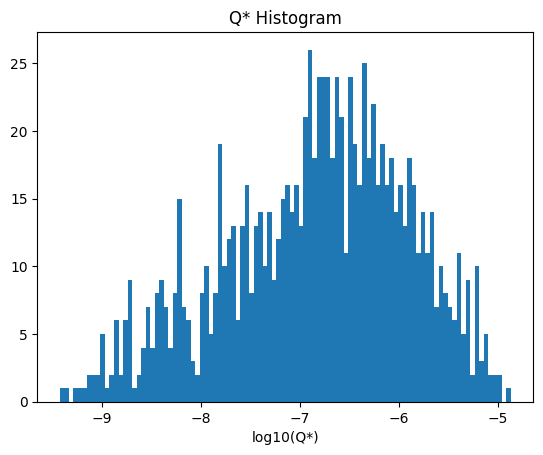

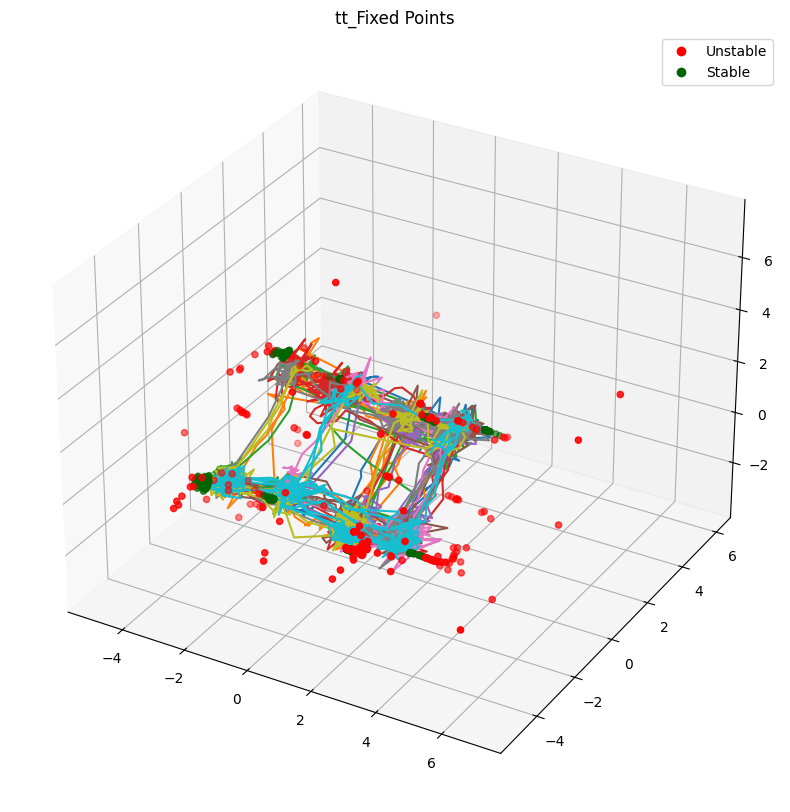

In [4]:
fps1 = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
                   )

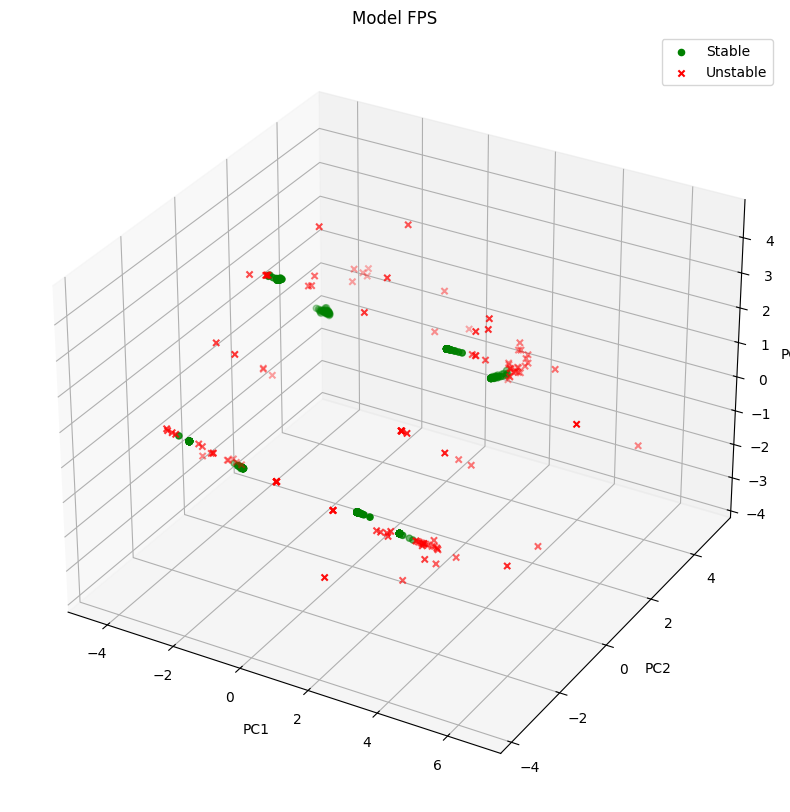

In [5]:
plot_model_fps(fps1, q_thresh = 4e-7)

In [6]:
comparison = Comparison(comparison_tag="Figure1NBFF_TTGRU")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

analysis_LDS = Analysis_DT(run_name = "LDS", filepath = path_LDS, model_type = "SAE")
comparison.load_analysis(analysis_LDS, group = "LDS")

analysis_NODE = Analysis_DT(run_name = "NODE", filepath = path_NODE, model_type = "SAE")
comparison.load_analysis(analysis_NODE, group = "NODE")

analysis_GRU = Analysis_DT(run_name = "GRU", filepath = path_GRU, model_type = "SAE")
comparison.load_analysis(analysis_GRU, group = "GRU")

comparison.regroup()

Working on 1 of 4: GRU
Group: GRU
Rate R2: 0.9491595650429852
State R2: 0.950774900192345
Working on 2 of 4: LDS
Group: LDS
Rate R2: 0.28670478950998496
State R2: 0.4839769559447383
Working on 3 of 4: NODE
Group: NODE
Rate R2: 0.7644305446041862
State R2: 0.9600890400363801
Working on 4 of 4: TT
Group: TT


array([[0.94915957, 0.9507749 ],
       [0.28670479, 0.48397696],
       [0.76443054, 0.96008904],
       [0.        , 0.        ]])

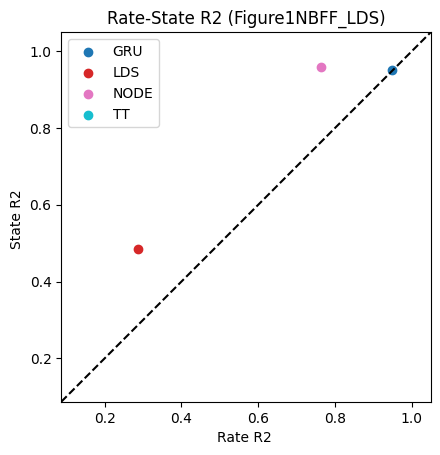

In [7]:
comparison.compare_rate_state_r2(save_pdf=True)

In [8]:
#comparison.plot_trials_3d_reference(num_trials =3)

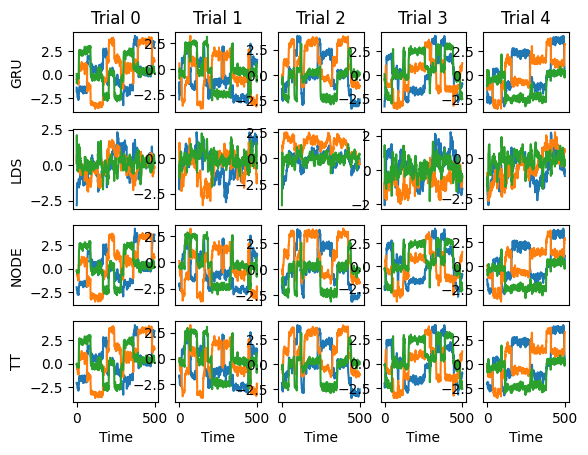

In [9]:
comparison.plot_trials_reference(num_trials =5)

In [10]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    if latents is not None:
        latents = pca.transform(latents)
        for i in range(100):
            ax.plot(latents[:,0], latents[:,1], latents[:,2], 'k')
    ax.set_title('Model FPS')
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')



Iteration 500/50000
q = 3.31E-02 +/- 1.23E-01
dq = 1.22E-04 +/- 3.93E-04

Iteration 1000/50000
q = 7.72E-03 +/- 3.38E-02
dq = 1.83E-05 +/- 7.61E-05

Iteration 1500/50000
q = 2.83E-03 +/- 1.29E-02
dq = 4.81E-06 +/- 2.27E-05

Iteration 2000/50000
q = 1.37E-03 +/- 6.07E-03
dq = 1.71E-06 +/- 8.43E-06

Iteration 2500/50000
q = 7.92E-04 +/- 3.38E-03
dq = 7.58E-07 +/- 3.59E-06

Iteration 3000/50000
q = 5.13E-04 +/- 2.15E-03
dq = 4.09E-07 +/- 1.83E-06

Iteration 3500/50000
q = 3.53E-04 +/- 1.48E-03
dq = 2.48E-07 +/- 1.08E-06

Iteration 4000/50000
q = 2.53E-04 +/- 1.06E-03
dq = 1.62E-07 +/- 7.15E-07

Iteration 4500/50000
q = 1.85E-04 +/- 7.69E-04
dq = 1.12E-07 +/- 4.97E-07

Iteration 5000/50000
q = 1.38E-04 +/- 5.66E-04
dq = 7.94E-08 +/- 3.51E-07

Iteration 5500/50000
q = 1.04E-04 +/- 4.20E-04
dq = 5.72E-08 +/- 2.55E-07

Iteration 6000/50000
q = 7.97E-05 +/- 3.13E-04
dq = 4.21E-08 +/- 1.88E-07

Iteration 6500/50000
q = 6.14E-05 +/- 2.33E-04
dq = 3.16E-08 +/- 1.40E-07

Iteration 7000/50000
q = 

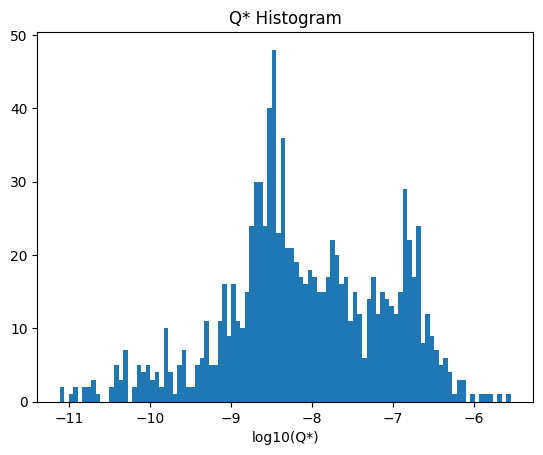

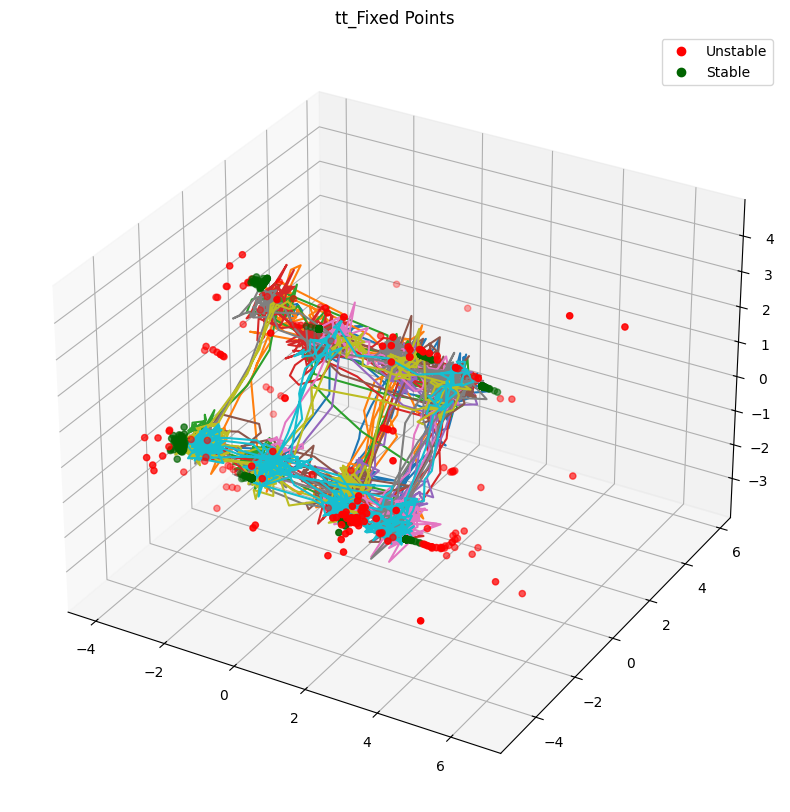

In [11]:
tt_fps = an_TT.plot_fps(
    inputs = torch.zeros(3),
    n_inits = 1024,
    learning_rate=6e-4,
    max_iters= 50000,
    
)

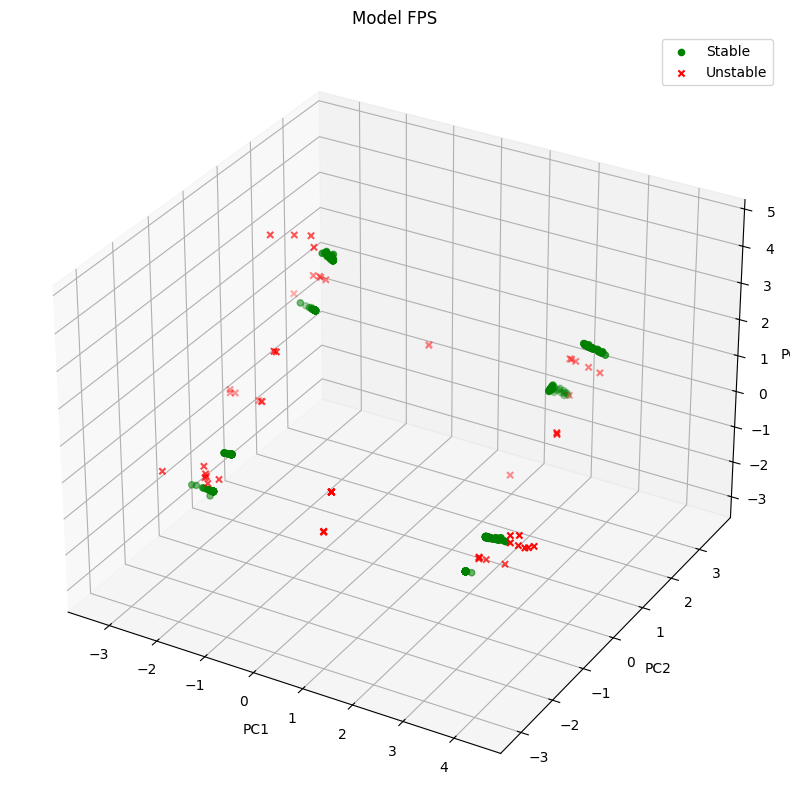

In [12]:
plot_model_fps(tt_fps, q_thresh = 1e-7)


Iteration 500/20000
q = 2.03E-02 +/- 9.62E-02
dq = 9.77E-05 +/- 3.84E-04

Iteration 1000/20000
q = 3.28E-03 +/- 2.80E-02
dq = 8.37E-06 +/- 5.31E-05

Iteration 1500/20000
q = 1.27E-03 +/- 1.22E-02
dq = 1.82E-06 +/- 2.00E-05

Iteration 2000/20000
q = 7.18E-04 +/- 5.34E-03
dq = 6.26E-07 +/- 9.25E-06

Iteration 2500/20000
q = 5.20E-04 +/- 2.20E-03
dq = 2.32E-07 +/- 4.15E-06

Iteration 3000/20000
q = 4.45E-04 +/- 9.50E-04
dq = 9.25E-08 +/- 1.59E-06

Iteration 3500/20000
q = 4.12E-04 +/- 6.33E-04
dq = 4.98E-08 +/- 4.61E-07

Iteration 4000/20000
q = 3.89E-04 +/- 5.72E-04
dq = 4.26E-08 +/- 1.07E-07

Iteration 4500/20000
q = 3.67E-04 +/- 5.44E-04
dq = 4.69E-08 +/- 7.05E-08

Iteration 5000/20000
q = 3.42E-04 +/- 5.17E-04
dq = 5.34E-08 +/- 7.84E-08

Iteration 5500/20000
q = 3.14E-04 +/- 4.88E-04
dq = 5.99E-08 +/- 8.62E-08

Iteration 6000/20000
q = 2.83E-04 +/- 4.56E-04
dq = 6.50E-08 +/- 9.15E-08

Iteration 6500/20000
q = 2.49E-04 +/- 4.22E-04
dq = 6.86E-08 +/- 9.58E-08

Iteration 7000/20000
q = 

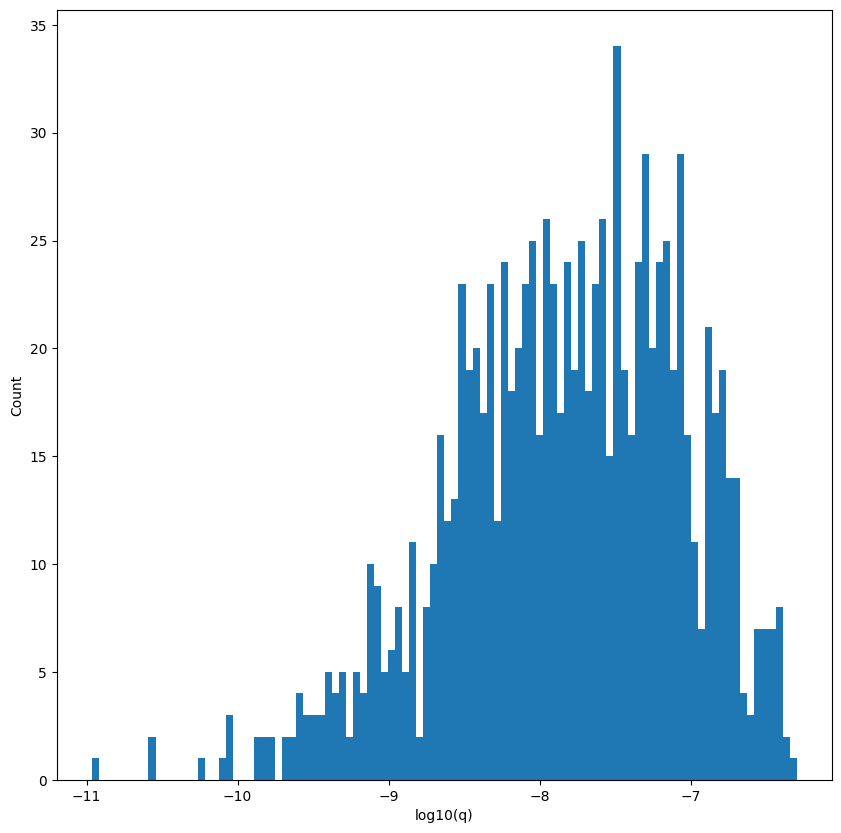

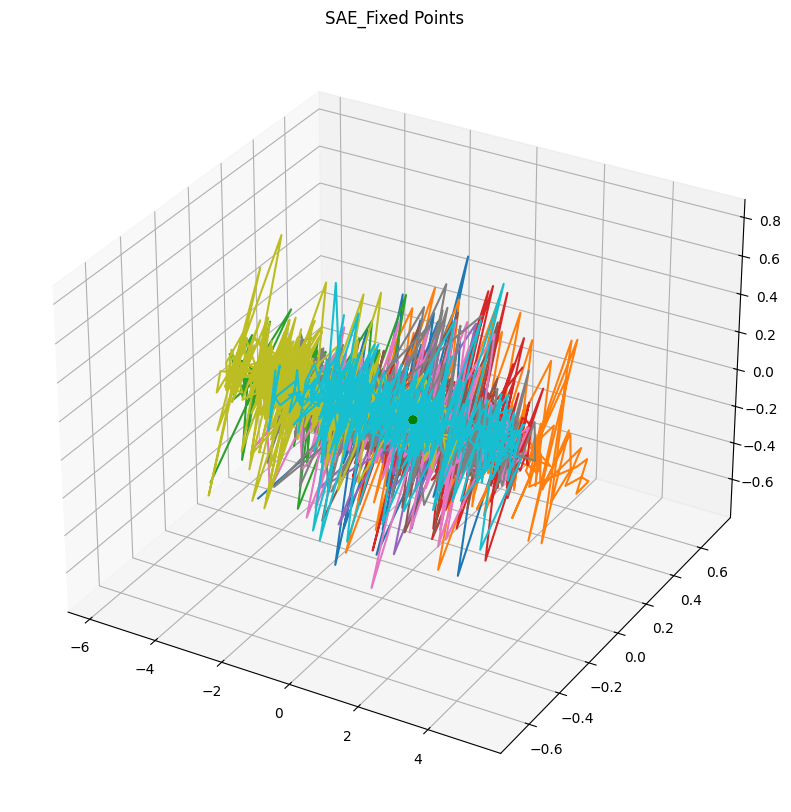

In [13]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)




Iteration 500/50000
q = 4.62E-04 +/- 1.48E-03
dq = 1.91E-06 +/- 6.31E-06

Iteration 1000/50000
q = 8.42E-05 +/- 4.45E-04
dq = 1.77E-07 +/- 7.23E-07

Iteration 1500/50000
q = 4.27E-05 +/- 4.04E-04
dq = 2.65E-08 +/- 1.25E-07

Iteration 2000/50000
q = 3.40E-05 +/- 3.99E-04
dq = 9.79E-09 +/- 9.35E-08

Iteration 2500/50000
q = 2.97E-05 +/- 3.97E-04
dq = 6.79E-09 +/- 6.80E-08

Iteration 3000/50000
q = 2.82E-05 +/- 3.96E-04
dq = 2.68E-09 +/- 2.97E-08

Iteration 3500/50000
q = 2.74E-05 +/- 3.96E-04
dq = 6.48E-10 +/- 7.32E-09

Iteration 4000/50000
q = 2.70E-05 +/- 3.96E-04
dq = 1.05E-09 +/- 1.54E-08

Iteration 4500/50000
q = 2.67E-05 +/- 3.96E-04
dq = 5.65E-10 +/- 6.50E-09

Iteration 5000/50000
q = 2.65E-05 +/- 3.96E-04
dq = 3.52E-10 +/- 6.26E-09

Iteration 5500/50000
q = 2.64E-05 +/- 3.96E-04
dq = 2.22E-09 +/- 6.37E-08

Iteration 6000/50000
q = 2.63E-05 +/- 3.96E-04
dq = 1.06E-10 +/- 1.78E-09

Iteration 6500/50000
q = 2.63E-05 +/- 3.96E-04
dq = 3.79E-10 +/- 6.61E-09

Iteration 7000/50000
q = 

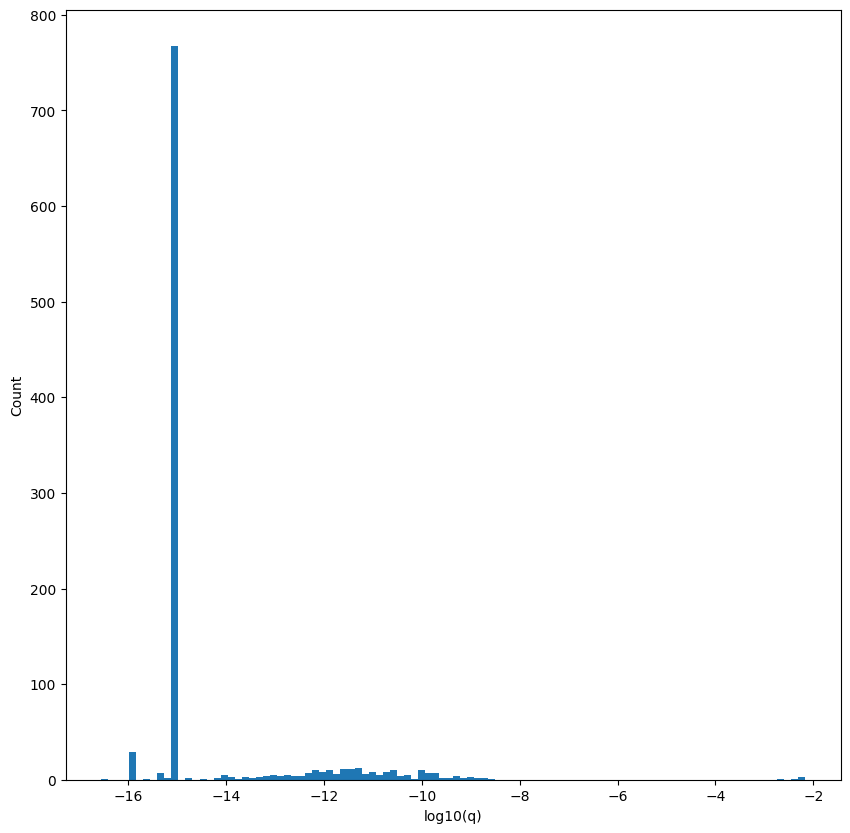

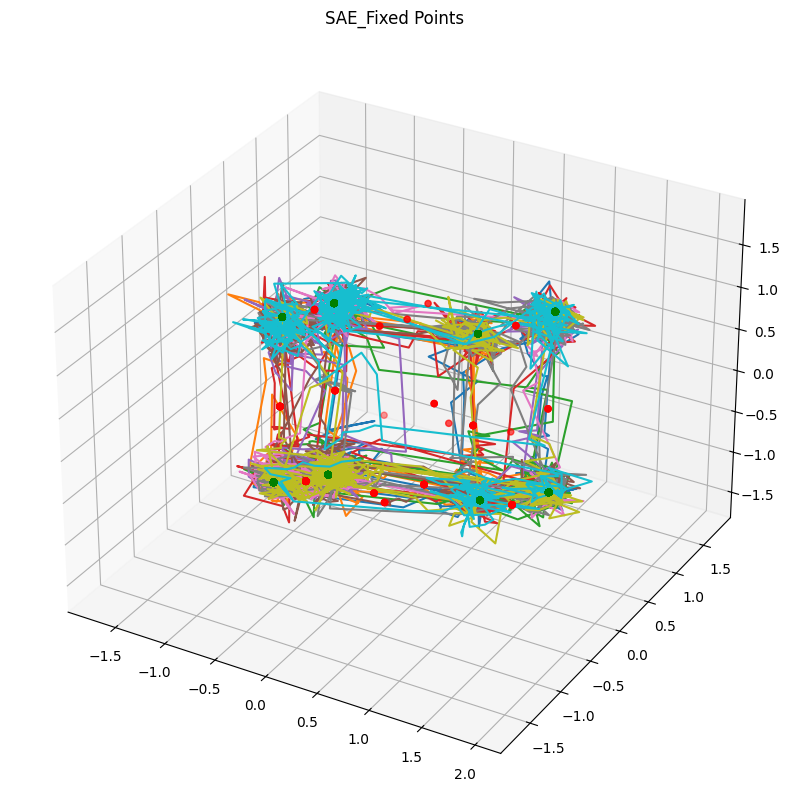

In [14]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)


Iteration 500/50000
q = 3.38E-02 +/- 1.41E-01
dq = 1.17E-04 +/- 3.91E-04

Iteration 1000/50000
q = 9.17E-03 +/- 5.39E-02
dq = 1.87E-05 +/- 8.58E-05

Iteration 1500/50000
q = 4.00E-03 +/- 2.88E-02
dq = 5.50E-06 +/- 3.27E-05

Iteration 2000/50000
q = 2.19E-03 +/- 1.70E-02
dq = 2.37E-06 +/- 1.71E-05

Iteration 2500/50000
q = 1.33E-03 +/- 1.06E-02
dq = 1.22E-06 +/- 9.36E-06

Iteration 3000/50000
q = 8.69E-04 +/- 7.02E-03
dq = 6.96E-07 +/- 5.48E-06

Iteration 3500/50000
q = 5.93E-04 +/- 4.82E-03
dq = 4.35E-07 +/- 3.55E-06

Iteration 4000/50000
q = 4.15E-04 +/- 3.37E-03
dq = 2.87E-07 +/- 2.38E-06

Iteration 4500/50000
q = 2.96E-04 +/- 2.39E-03
dq = 1.95E-07 +/- 1.60E-06

Iteration 5000/50000
q = 2.15E-04 +/- 1.72E-03
dq = 1.35E-07 +/- 1.10E-06

Iteration 5500/50000
q = 1.58E-04 +/- 1.27E-03
dq = 9.44E-08 +/- 7.70E-07

Iteration 6000/50000
q = 1.18E-04 +/- 9.44E-04
dq = 6.66E-08 +/- 5.50E-07

Iteration 6500/50000
q = 8.98E-05 +/- 7.10E-04
dq = 4.81E-08 +/- 4.02E-07

Iteration 7000/50000
q = 

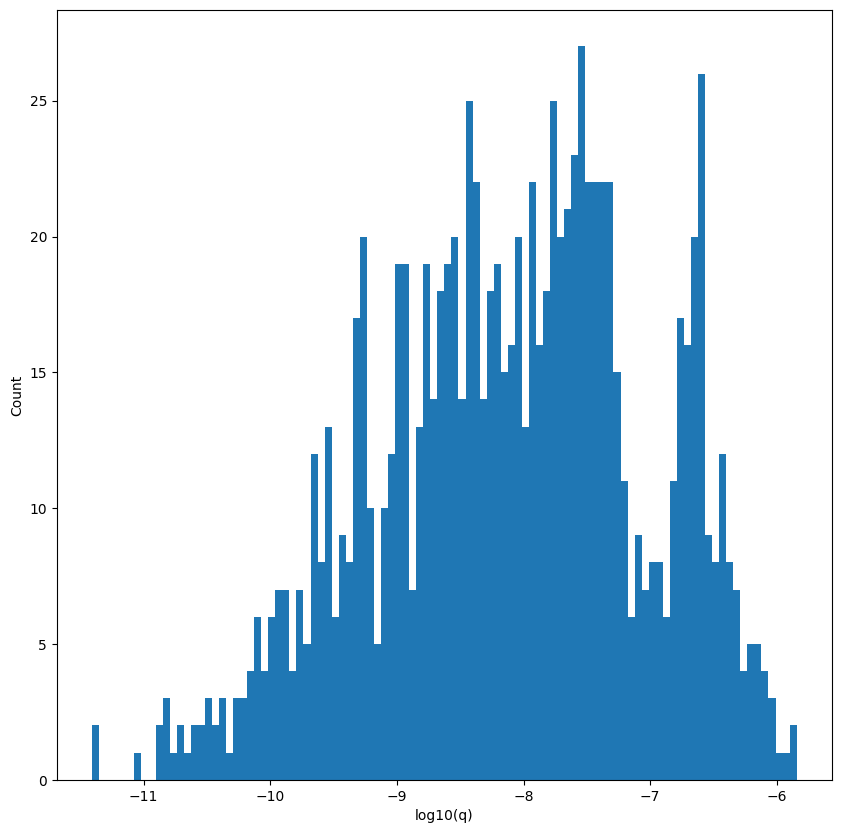

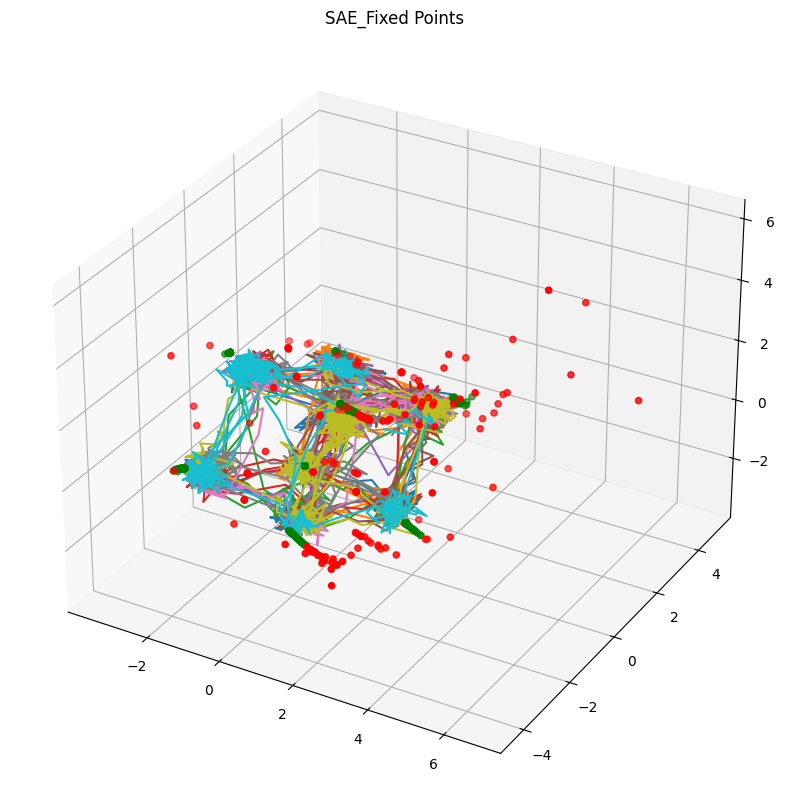

In [15]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

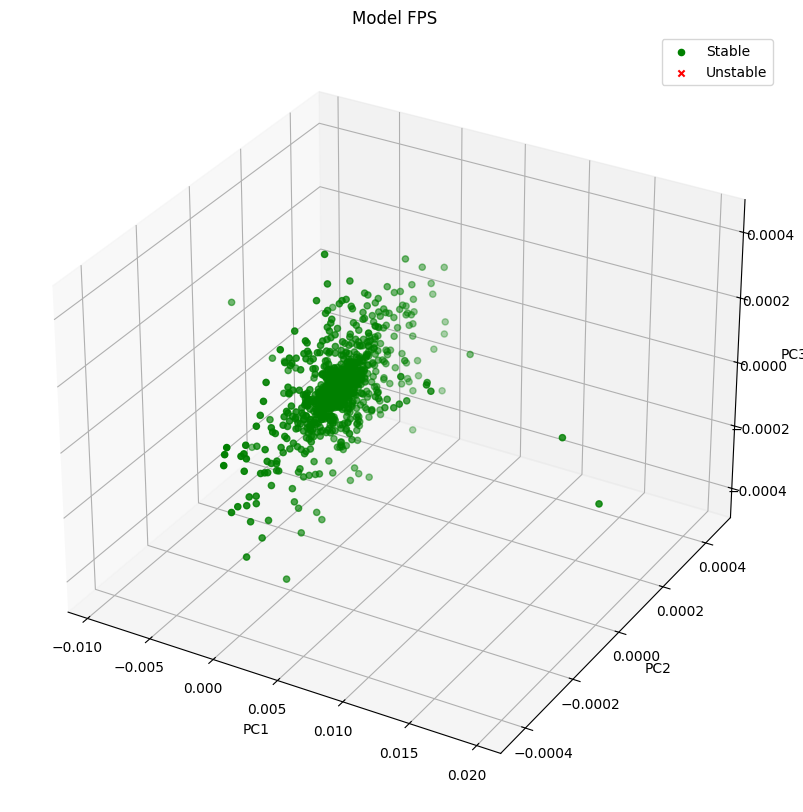

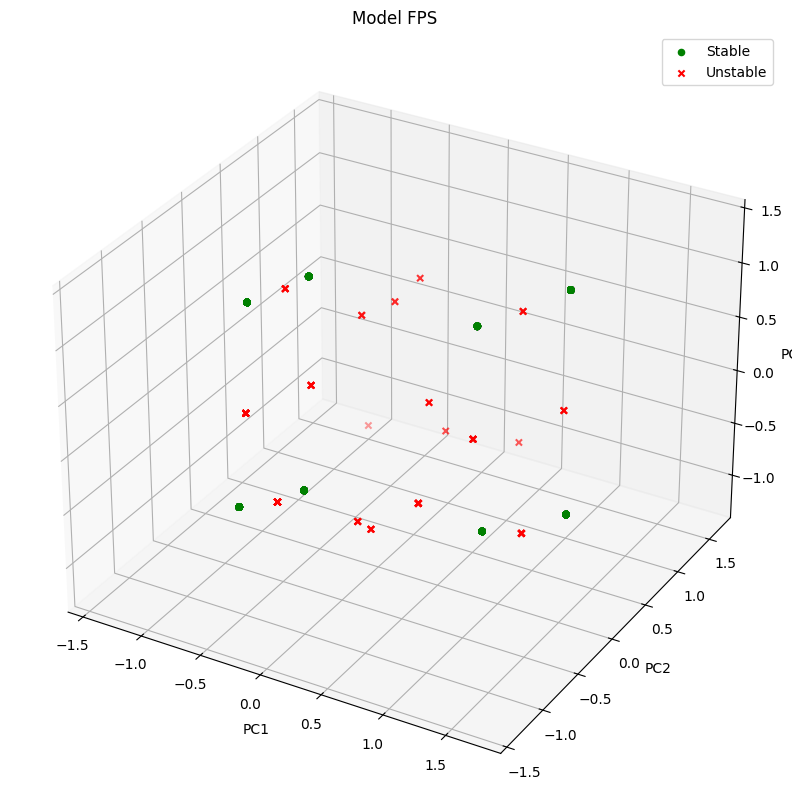

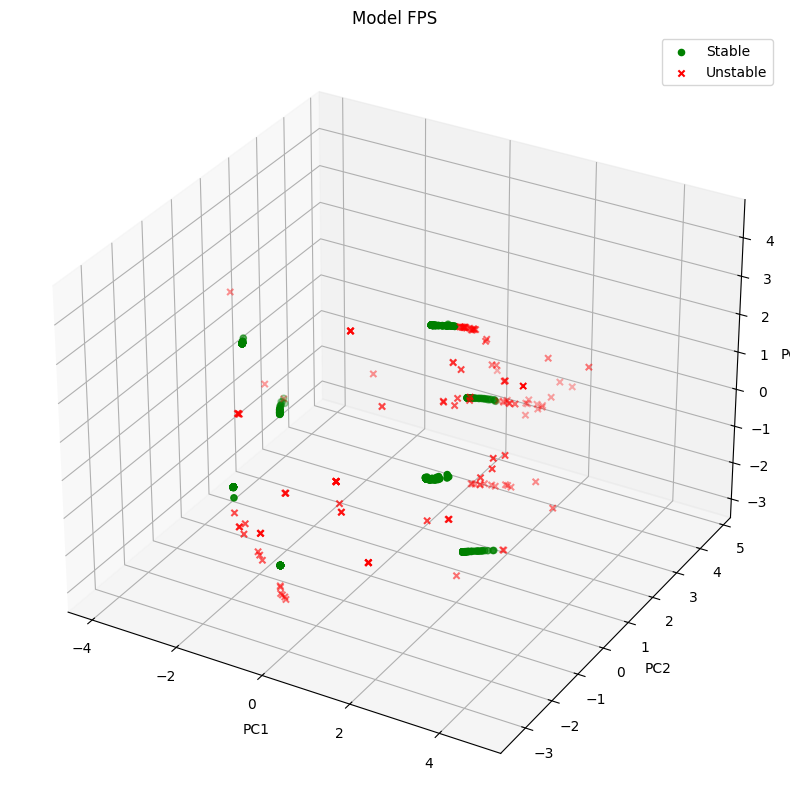

In [16]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)